In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
ima = cv2.imread('C:/Users/HP/imacladata/testimage/Chris.jpg')
ima.shape

(300, 200, 3)

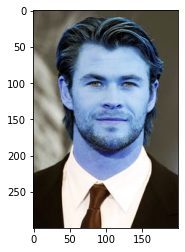

In [3]:
imag= plt.imshow(ima)
imag

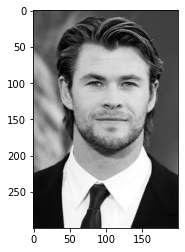

In [4]:
grm= cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
plt.imshow(grm, cmap='gray')

In [5]:
facade = cv2.CascadeClassifier('C:/Users/HP/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
face = facade.detectMultiScale(grm, 1.3, 5)
face

array([[ 45,  51, 130, 130]])

In [6]:
(x,y,w,h) = face[0]
x,y,w,h

(45, 51, 130, 130)

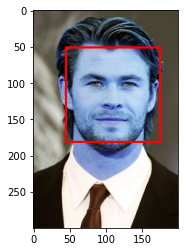

In [7]:
faceim = cv2.rectangle(ima,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(faceim)

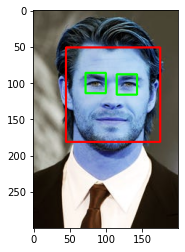

In [8]:
eyescade = cv2.CascadeClassifier('C:/Users/HP/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')

cv2.destroyAllWindows()
for (x,y,w,h) in face:
    faceim = cv2.rectangle(ima,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grm[y:y+h, x:x+w]
    roi_color = faceim[y:y+h, x:x+w]
    eyes = eyescade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(faceim, cmap='gray')
plt.show()

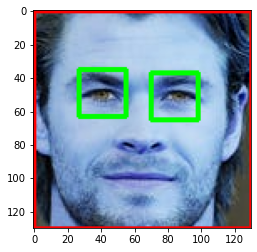

In [9]:
plt.imshow(roi_color, cmap='gray')

In [10]:
def gcropped2(image_path):
    ima = cv2.imread(image_path)
    grm = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    faces = facade.detectMultiScale(grm, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = grm[y:y+h, x:x+w]
        roi_color = ima[y:y+h, x:x+w]
        eyes = eyescade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

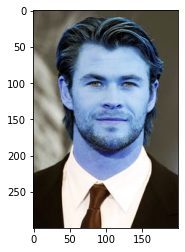

In [11]:
orgim = cv2.imread('C:/Users/HP/imacladata/testimage/Chris.jpg')
plt.imshow(orgim)

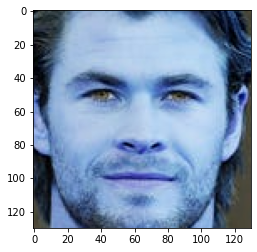

In [12]:
crima = gcropped2('C:/Users/HP/imacladata/testimage/Chris.jpg')
plt.imshow(crima)

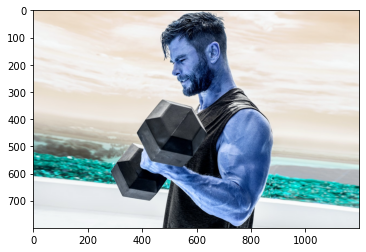

In [13]:
orgimobs = cv2.imread('C:/Users/HP/imacladata/testimage/chris-hemsworth.jpg')
plt.imshow(orgimobs)

In [14]:
crimano = gcropped2('C:/Users/HP/imacladata/testimage/chris-hemsworth.jpg')
crimano

In [15]:
datapath = "D:/dataset"
Crodata = "D:/dataset/cropped/"

In [16]:
import os
imadirs = []
for entry in os.scandir(datapath):
    if entry.is_dir():
        imadirs.append(entry.path)

In [17]:
imadirs

['D:/dataset\\hela', 'D:/dataset\\hulk', 'D:/dataset\\Robert']

In [18]:
import shutil
if os.path.exists(Crodata):
     shutil.rmtree(Crodata)
os.mkdir(Crodata)

In [19]:
croimadirs=[]
avengerfilenamedict= {}

for imadir in imadirs:
    count = 1
    avengername= imadir.split('\\')[-1]
    print(avengername)
    
    avengerfilenamedict[avengername]=[]
    
    for entry in os.scandir(imadir):
        roi_color = gcropped2(entry.path)
        if roi_color is not None:
            crofolder =  Crodata + avengername
            if not os.path.exists(crofolder):
                os.makedirs(crofolder)
                croimadirs.append(crofolder)
                print("Generating cropped images in folder: ",crofolder)
                
            crofilename = avengername + str(count) + ".png"
            crofilepath = crofolder + "/" + crofilename 
            
            cv2.imwrite(crofilepath, roi_color)
            avengerfilenamedict[avengername].append(crofilepath)
            count += 1    

hela
Generating cropped images in folder:  D:/dataset/cropped/hela
hulk
Generating cropped images in folder:  D:/dataset/cropped/hulk
Robert
Generating cropped images in folder:  D:/dataset/cropped/Robert


In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

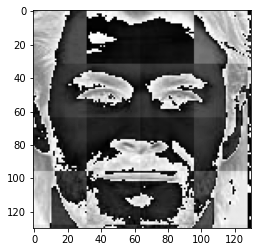

In [22]:
im_har = w2d(crima,'db1',5)
plt.imshow(im_har, cmap='gray')

In [23]:
avengerfilenamedict

{'hela': ['D:/dataset/cropped/hela/hela1.png',
  'D:/dataset/cropped/hela/hela2.png',
  'D:/dataset/cropped/hela/hela3.png',
  'D:/dataset/cropped/hela/hela4.png',
  'D:/dataset/cropped/hela/hela5.png',
  'D:/dataset/cropped/hela/hela6.png',
  'D:/dataset/cropped/hela/hela7.png',
  'D:/dataset/cropped/hela/hela8.png',
  'D:/dataset/cropped/hela/hela9.png',
  'D:/dataset/cropped/hela/hela10.png',
  'D:/dataset/cropped/hela/hela11.png',
  'D:/dataset/cropped/hela/hela12.png',
  'D:/dataset/cropped/hela/hela13.png',
  'D:/dataset/cropped/hela/hela14.png',
  'D:/dataset/cropped/hela/hela15.png',
  'D:/dataset/cropped/hela/hela16.png',
  'D:/dataset/cropped/hela/hela17.png',
  'D:/dataset/cropped/hela/hela18.png',
  'D:/dataset/cropped/hela/hela19.png',
  'D:/dataset/cropped/hela/hela20.png'],
 'hulk': ['D:/dataset/cropped/hulk/hulk1.png',
  'D:/dataset/cropped/hulk/hulk2.png',
  'D:/dataset/cropped/hulk/hulk3.png',
  'D:/dataset/cropped/hulk/hulk4.png',
  'D:/dataset/cropped/hulk/hulk5.png

In [24]:
clsdict = {}
count = 0
for avengername in avengerfilenamedict.keys():
    clsdict[avengername] = count
    count = count + 1
clsdict

{'hela': 0, 'hulk': 1, 'Robert': 2}

In [25]:
X, y = [], []
for avengername, trainfiles in avengerfilenamedict.items():
    for trainima in trainfiles:
        img = cv2.imread(trainima)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combinedima = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combinedima)
        y.append(clsdict[avengername])    

In [26]:
len(X)

54

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(54, 4096)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7142857142857143

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.62      0.83      0.71         6
           2       1.00      0.50      0.67         4

    accuracy                           0.71        14
   macro avg       0.79      0.69      0.71        14
weighted avg       0.77      0.71      0.71        14



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import svm

In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [33]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.900,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.775,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.850,{'logisticregression__C': 1}


In [34]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [35]:
best_clf = best_estimators['svm']

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 1, 0],
       [1, 5, 0],
       [0, 0, 4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

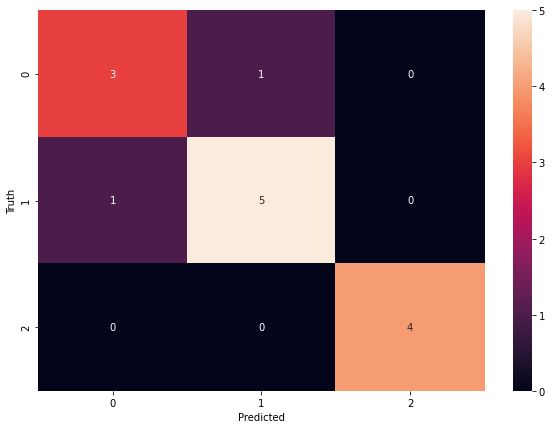

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
clsdict

{'hela': 0, 'hulk': 1, 'Robert': 2}

In [39]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [41]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(clsdict))